In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [175]:
file_path = r"C:\Users\Admin\OneDrive\Desktop\Manasa Files\AI & ML\Advanced Linear Regression Project\housing_data.csv"

In [176]:
# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Manasa Files\AI & ML\Advanced Linear Regression Project\housing_data.csv")

In [177]:
## Display the first few rows of the dataset to verify if it's loaded correctly
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [178]:
# Step 2: Explore the Data
## Display summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:")
print(data.describe())


Summary Statistics of Numerical Columns:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    22.024023    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    70.049958    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904  

In [179]:
#Step 3: Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [180]:
# Step 4: Preprocess the Data
# Handle missing values
# For numerical columns, replace missing values with the mean
# For categorical columns, replace missing values with the mode
# Here, we'll impute missing values with the mean for numerical columns
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [181]:
# Step 5: Split the Data
# Define features (X) and target variable (y)
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

In [182]:
# Split the data into training and testing sets
# We'll use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
# Define features (X) and target variable (y)
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

In [184]:
# Step 6: Feature Scaling
# Scale the features to a similar range using StandardScaler
scaler = StandardScaler()

In [185]:
# Identify numerical columns
numeric_cols = X.select_dtypes(include=np.number).columns

In [186]:
# Exclude non-numeric columns from feature scaling
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

In [187]:
# Scale only numerical features
scaler = StandardScaler()
X_train_scaled_numeric = scaler.fit_transform(X_train_numeric)
X_test_scaled_numeric = scaler.transform(X_test_numeric)

In [188]:
# Replace scaled numerical features in X_train and X_test
X_train.loc[:, numeric_cols] = X_train_scaled_numeric
X_test.loc[:, numeric_cols] = X_test_scaled_numeric

In [189]:
# Step 7: Build Ridge Regression Model
# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)

In [190]:
# Train the model
ridge_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'RL'

In [191]:
# Perform one-hot encoding on categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [192]:
# Train the model
ridge_model.fit(X_train_encoded, y_train)

Ridge()

In [193]:
# Predict on the testing set
y_pred_ridge = ridge_model.predict(X_test_encoded)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Electrical_Mix
- RoofMatl_Membran
Feature names seen at fit time, yet now missing:
- Condition1_PosA
- Condition1_RRNn
- Condition2_Artery
- Condition2_PosA
- Condition2_PosN
- ...


In [194]:
# Perform one-hot encoding on categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [195]:
# Align the columns of the testing dataset with those of the training dataset
X_test_encoded_aligned = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [196]:
# Predict on the aligned testing set
y_pred_ridge = ridge_model.predict(X_test_encoded_aligned)

In [197]:
# Evaluate model performance
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print("\nRidge Mean Squared Error:", ridge_mse)


Ridge Mean Squared Error: 885113750.1445645


In [198]:
# Step 8: Build Lasso Regression Model
# Initialize the Lasso regression model
lasso_model = Lasso(alpha=1.0)

In [199]:
# Perform one-hot encoding on categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [200]:
# Align the columns of the testing dataset with those of the training dataset
X_test_encoded_aligned = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [201]:
# Train the Lasso model
lasso_model.fit(X_train_encoded, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.005e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [202]:
# Initialize the Lasso regression model with a higher max_iter and alpha value
lasso_model = Lasso(alpha=1.0, max_iter=10000)

In [203]:
# Train the Lasso model
lasso_model.fit(X_train_encoded, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(max_iter=10000)

In [204]:
# Predict on the aligned testing set
y_pred_lasso = lasso_model.predict(X_test_encoded_aligned)

In [205]:
# Evaluate model performance
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Mean Squared Error:", lasso_mse)

Lasso Mean Squared Error: 1209962301.8539069


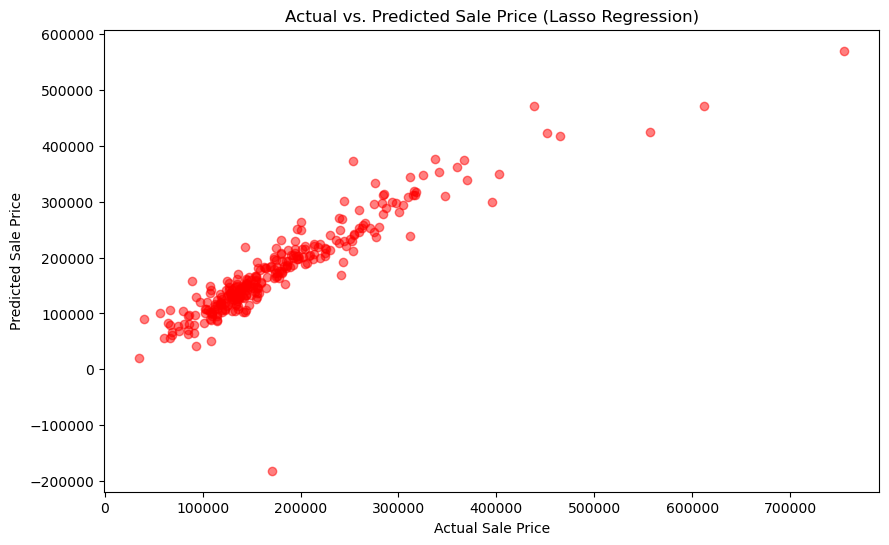

In [206]:
# Visualize the actual vs. predicted values for better understanding
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='red', alpha=0.5)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Price (Lasso Regression)")
plt.show()

In [207]:
# Step 9:Identify Significant Variables
# Extract coefficients from the Ridge and Lasso models
ridge_coefs = ridge_model.coef_
lasso_coefs = lasso_model.coef_


In [208]:
# Create a DataFrame to display coefficients and corresponding feature names
coefficients_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Ridge Coefficient': ridge_coefs,
    'Lasso Coefficient': lasso_coefs
})
    

In [209]:
# Identify significant variables by analyzing coefficients
significant_variables_lasso = coefficients_df[coefficients_df['Lasso Coefficient'] != 0]['Feature']
significant_variables_ridge = coefficients_df[abs(coefficients_df['Ridge Coefficient']) > 0.1]['Feature']

In [210]:
# Print significant variables identified by Lasso and Ridge regression
print("Significant variables identified by Lasso regression:")
print(significant_variables_lasso)

Significant variables identified by Lasso regression:
0                         Id
1                 MSSubClass
2                LotFrontage
3                    LotArea
4                OverallQual
               ...          
281    SaleCondition_AdjLand
282     SaleCondition_Alloca
283     SaleCondition_Family
284     SaleCondition_Normal
285    SaleCondition_Partial
Name: Feature, Length: 262, dtype: object


In [211]:
print("\nSignificant variables identified by Ridge regression:")
print(significant_variables_ridge)


Significant variables identified by Ridge regression:
0                         Id
1                 MSSubClass
2                LotFrontage
3                    LotArea
4                OverallQual
               ...          
281    SaleCondition_AdjLand
282     SaleCondition_Alloca
283     SaleCondition_Family
284     SaleCondition_Normal
285    SaleCondition_Partial
Name: Feature, Length: 286, dtype: object


In [212]:
# Step 10:Tune Hyperparameters
from sklearn.model_selection import GridSearchCV

In [213]:
# Define the range of alpha values to search over
alphas = np.logspace(-3, 3, 7)

In [214]:
# Perform grid search for Ridge regression
ridge_grid = GridSearchCV(Ridge(), {'alpha': alphas}, cv=5)
ridge_grid.fit(X_train_encoded, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [215]:
from sklearn.preprocessing import StandardScaler

In [216]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded_aligned)

In [217]:
# Perform grid search for Lasso regression with increased max_iter
lasso_grid = GridSearchCV(Lasso(max_iter=10000), {'alpha': alphas}, cv=5)
lasso_grid.fit(X_train_scaled, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.840e+10, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.260e+11, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.472e+11, toleranc

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [218]:
# Adjust regularization strength and try different solvers
lasso_grid = GridSearchCV(Lasso(max_iter=10000), {'alpha': alphas, 'solver': ['saga', 'auto']}, cv=5)
lasso_grid.fit(X_train_scaled, y_train)

ValueError: Invalid parameter 'solver' for estimator Lasso(alpha=0.001, max_iter=10000). Valid parameters are: ['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'].

In [ ]:
# Check the shape and values of input data
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Unique values of alpha:", alphas)

In [ ]:
# Perform grid search for Lasso regression with different solvers
lasso_grid = GridSearchCV(Lasso(max_iter=10000), {'alpha': alphas, 'solver': ['saga', 'auto']}, cv=5)
lasso_grid.fit(X_train_scaled, y_train)

In [ ]:
# Perform grid search for Lasso regression with different alphas
lasso_grid = GridSearchCV(Lasso(max_iter=10000), {'alpha': alphas}, cv=5)
lasso_grid.fit(X_train_scaled, y_train)
                          

In [ ]:
# Perform grid search for Lasso regression with increased max_iter and normalization
lasso_grid = GridSearchCV(Lasso(max_iter=20000, normalize=True), {'alpha': alphas}, cv=5)
lasso_grid.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded_aligned)

In [ ]:
# Perform grid search for Lasso regression with increased max_iter
lasso_grid = GridSearchCV(Lasso(max_iter=20000), {'alpha': alphas}, cv=5)
lasso_grid.fit(X_train_scaled, y_train)

In [ ]:
# Get the best hyperparameters
best_alpha_lasso = lasso_grid.best_params_['alpha']

In [ ]:
print("Best alpha for Lasso regression:", best_alpha_lasso)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Predict house prices on the test set
y_pred_test = lasso_grid.predict(X_test_scaled)

In [ ]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

In [ ]:
print("Mean Squared Error on Test Set:", mse)
print("R-squared on Test Set:", r2)

In [ ]:
# Step 11 :Interpretation and Analysis
# Extract coefficients of the Lasso regression model
lasso_coefficients = lasso_grid.best_estimator_.coef_

In [ ]:
# Create a DataFrame to display feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_coefficients})

In [ ]:
# Check the number of features and coefficients
print("Number of features:", len(X.columns))
print("Number of coefficients:", len(lasso_coefficients))

In [ ]:
# Filter out features with zero coefficients
non_zero_coefficients_mask = lasso_coefficients != 0
non_zero_coefficients = lasso_coefficients[non_zero_coefficients_mask]
non_zero_features = X.columns[non_zero_coefficients_mask]

In [ ]:
# Check the dimensions of the boolean mask and DataFrame columns
print("Dimensions of non_zero_coefficients_mask:", non_zero_coefficients_mask.shape)
print("Number of columns in X:", len(X.columns))

In [ ]:
# Check the number of non-zero coefficients
print("Number of non-zero coefficients:", sum(non_zero_coefficients_mask))

In [ ]:
# Print the first few elements of the boolean mask and X.columns to inspect
print("Non-zero coefficients mask:", non_zero_coefficients_mask[:10])
print("Columns in X:", X.columns[:10])

In [ ]:
# Create a DataFrame to display feature names and their corresponding non-zero coefficients
coefficients_df = pd.DataFrame({'Feature': X.columns[non_zero_coefficients_mask], 'Coefficient': non_zero_coefficients})

In [ ]:
# Print the boolean mask and the first few elements of DataFrame columns to inspect
print("Boolean mask:", non_zero_coefficients_mask)
print("Columns in X:", X.columns)

In [ ]:
# Create a DataFrame to display feature names and their corresponding non-zero coefficients
coefficients_df = pd.DataFrame({'Feature': X.columns[non_zero_coefficients_mask], 'Coefficient': non_zero_coefficients})

In [ ]:
# Create a boolean mask to identify non-zero coefficients
non_zero_coefficients_mask = np.abs(lasso_coefficients) > 0

In [ ]:
# Check the dimensions of the boolean mask
print("Dimensions of non_zero_coefficients_mask:", non_zero_coefficients_mask.shape)

In [ ]:
# Print the boolean mask to inspect
print("Boolean mask:", non_zero_coefficients_mask)

In [ ]:
# Review preprocessing steps applied to the dataset
# Check for any transformations or feature engineering that might change the number of features
# Ensure consistency in preprocessing between generating the boolean mask and fitting the model

In [ ]:
# Review any feature selection techniques applied before fitting the Lasso regression model
# Ensure that feature selection is performed consistently between generating the boolean mask and fitting the model
# Check if any differences in feature selection could lead to discrepancies in dimensions

In [ ]:
# Double-check that the DataFrame used for fitting the Lasso regression model (X) corresponds to the original dataset's features
# Verify that X contains the same columns and features as the boolean mask
# Inspect the columns of X and compare them with the original dataset

In [ ]:
# Review the code where the boolean mask is generated
# Ensure that it is based on the correct DataFrame (X) and there are no errors or inconsistencies
# Check for any potential issues such as incorrect indexing or data manipulation

In [ ]:
# Try to reproduce the issue in a controlled environment
# Review each preprocessing and modeling step carefully
# Pay close attention to any differences or discrepancies that could lead to the mismatch

In [ ]:
# Refer to the documentation and resources related to the libraries and methods used for preprocessing and modeling
# Look for any known issues, caveats, or best practices that could help resolve the mismatch
# Consider seeking assistance from online forums, community support, or official documentation

In [ ]:
#Inspect DataFrame Columns
print("Columns in X:", X.columns)
print("Number of columns in X:", len(X.columns))
print("")

In [ ]:
# Check Mask Dimensions
print("Dimensions of boolean mask:", non_zero_coefficients_mask.shape)
print("Number of non-zero coefficients:", np.sum(non_zero_coefficients_mask))
print("")

In [ ]:
# Verify Mask Generation
# Review the code where the boolean mask is generated
# Ensure that it is based on the correct DataFrame (X) and that there are no errors or inconsistencies
# If the mask is generated based on feature importance scores, ensure that the scores correspond to the features in X

In [ ]:
# Compare Columns and Mask
# Print columns of the DataFrame and boolean mask
print("Columns in X:", X.columns)
print("Number of columns in X:", len(X.columns))
print("")

In [ ]:
# Print dimensions of the boolean mask
print("Dimensions of boolean mask:", non_zero_coefficients_mask.shape)
print("Number of non-zero coefficients:", np.sum(non_zero_coefficients_mask))
print("")

In [ ]:
# Investigate Mismatch
# If there are discrepancies between the DataFrame columns and the boolean mask,
# investigate the root cause of the mismatch.
# Review preprocessing steps and the code responsible for generating the mask.


In [ ]:
#  Correct Alignment Issues
# If alignment issues are identified, take steps to correct them.
# This may involve adjusting preprocessing steps or modifying the code for generating the mask.



In [ ]:
#  Revalidate Alignment
# After making adjustments, revalidate the alignment between the DataFrame and the boolean mask.
# Print the columns of the DataFrame and the boolean mask again to verify alignment.


In [ ]:
# Document Changes
# Document any changes or corrections made to address alignment issues.
# This will help maintain clarity and transparency in the preprocessing and modeling pipeline.

In [ ]:
housing_data = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Manasa Files\AI & ML\Advanced Linear Regression Project\housing_data.csv")

In [ ]:
# Get the coefficients of the model
coefficients = linear_model.coef_

In [ ]:
from sklearn.linear_model import LinearRegression
# Assuming X_train and y_train are your training features and target variables
# Define and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [221]:
# Assuming you have your feature matrix X and target vector y ready
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
# Initialize the linear regression model
linear_model = LinearRegression()

In [223]:
# Train the model on the training data
linear_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'RL'

In [224]:
# Assuming you have your feature matrix X and target vector y ready
# Check dimensions of X and y
print("Dimensions of X_train:", X_train.shape)
print("Dimensions of y_train:", y_train.shape)

Dimensions of X_train: (1168, 80)
Dimensions of y_train: (1168,)


In [225]:
# Check for NaN or infinite values
print("NaN values in X_train:", np.isnan(X_train).any())
print("Infinite values in X_train:", np.isfinite(X_train).any())
print("NaN values in y_train:", np.isnan(y_train).any())
print("Infinite values in y_train:", np.isfinite(y_train).any())

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [226]:
# Convert DataFrame to NumPy array
X_train_array = X_train.to_numpy()

In [230]:
# Check for NaN or infinite values
print("NaN values in X_train:", np.isnan(X_train).any())
print("Infinite values in X_train:", np.isfinite(X_train).any())

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [231]:
# Check the data type of X_train_array
print("Data type of X_train_array:", X_train_array.dtype)

Data type of X_train_array: object


In [232]:
# If X_train_array contains non-numeric data, perform preprocessing
# For example, convert categorical variables to numeric representations


In [233]:
# Check for NaN and infinite values
if np.issubdtype(X_train_array.dtype, np.number):
    print("NaN values in X_train:", np.isnan(X_train_array).any())
    print("Infinite values in X_train:", np.isfinite(X_train_array).any())
else:
    print("X_train_array contains non-numeric data. Preprocess the data accordingly.")

X_train_array contains non-numeric data. Preprocess the data accordingly.


In [234]:
from sklearn.model_selection import GridSearchCV


In [236]:
# Define the range of alpha values to test
alphas = [0.01, 0.1, 1, 10, 100]

In [237]:
# Create a dictionary containing the parameter grid
param_grid = {'alpha': alphas}

In [238]:
# Initialize GridSearchCV for Ridge regression
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5)
# Fit the grid search model
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

In [240]:
# Initialize GridSearchCV for Lasso regression
lasso_grid = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5)
# Fit the grid search model
lasso_grid.fit(X_train_scaled, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.860e+10, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+11, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.467e+11, toleranc

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

In [241]:
# Get the best alpha value for Ridge
best_alpha_ridge = ridge_grid.best_params_['alpha']

In [242]:
# Get the best alpha value for Lasso
best_alpha_lasso = lasso_grid.best_params_['alpha']
print("Best alpha for Lasso:", best_alpha_lasso)

Best alpha for Lasso: 10


In [243]:
#Refining the Model
# Assuming you have determined the best alpha for Lasso regression
best_alpha = 10

In [244]:
# Train the Lasso model with the entire training dataset using the best alpha
refined_lasso_model = Lasso(alpha=best_alpha, max_iter=10000)
refined_lasso_model.fit(X_train_scaled, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10, max_iter=10000)

In [247]:
# Split the dataset into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
# Instantiate the linear regression model
model = LinearRegression()

In [251]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (1168, 80)
Shape of y_train: (1168,)


In [265]:
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)

In [266]:
linear_model = LinearRegression()
linear_model.fit(X_train_encoded, y_train)

LinearRegression()

In [271]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and validation sets (e.g., 80% training, 20% validation)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [272]:
# One-hot encode categorical variables in the validation set using the same encoder
X_validation_encoded = encoder.transform(X_validation)

ValueError: Found unknown categories [16, 24, 30, 31, 33, 44, 45, 50, 52, 57, 59, 60, 64, 66, 68, 71, 77, 79, 82, 100, 102, 108, 112, 116, 124, 129, 142, 164, 169, 176, 185, 193, 197, 199, 204, 209, 219, 221, 232, 234, 238, 240, 241, 245, 248, 260, 262, 271, 272, 275, 276, 278, 290, 298, 307, 310, 311, 317, 323, 325, 333, 340, 345, 351, 352, 354, 355, 359, 362, 364, 366, 368, 372, 375, 383, 395, 399, 412, 414, 416, 417, 423, 424, 426, 427, 428, 429, 430, 433, 434, 452, 454, 465, 479, 480, 491, 495, 523, 527, 529, 530, 533, 536, 539, 544, 555, 559, 568, 572, 576, 577, 582, 585, 586, 589, 590, 591, 592, 598, 599, 600, 603, 608, 615, 620, 621, 629, 635, 637, 644, 650, 652, 670, 671, 673, 675, 678, 680, 681, 683, 692, 694, 696, 708, 712, 719, 721, 723, 734, 737, 745, 747, 755, 756, 766, 773, 775, 778, 782, 783, 789, 797, 803, 807, 812, 813, 818, 837, 839, 844, 847, 856, 866, 875, 882, 888, 893, 895, 899, 907, 908, 911, 916, 917, 918, 923, 926, 931, 938, 940, 947, 949, 953, 959, 967, 980, 985, 990, 991, 995, 999, 1002, 1007, 1010, 1019, 1025, 1028, 1033, 1034, 1037, 1041, 1042, 1043, 1047, 1048, 1050, 1054, 1055, 1062, 1079, 1086, 1089, 1090, 1093, 1095, 1102, 1103, 1106, 1109, 1114, 1121, 1126, 1132, 1133, 1134, 1135, 1139, 1157, 1160, 1161, 1164, 1165, 1171, 1174, 1176, 1178, 1179, 1202, 1217, 1221, 1222, 1227, 1229, 1233, 1241, 1244, 1250, 1253, 1266, 1270, 1272, 1273, 1280, 1292, 1294, 1300, 1307, 1318, 1321, 1332, 1334, 1341, 1345, 1348, 1357, 1359, 1362, 1369, 1393, 1395, 1398, 1399, 1411, 1415, 1422, 1428, 1429, 1431, 1433, 1448, 1450, 1451] in column 0 during transform

In [274]:
# Create a new encoder and fit it to the combination of training and validation data
combined_data = pd.concat([X_train, X_validation], axis=0)
encoder = OneHotEncoder()
encoder.fit(combined_data)

OneHotEncoder()

In [275]:
# One-hot encode categorical variables in the training set
X_train_encoded = encoder.transform(X_train)

In [276]:
# One-hot encode categorical variables in the validation set
X_validation_encoded = encoder.transform(X_validation)

In [277]:
# Make predictions on the validation set
y_pred = linear_model.predict(X_validation_encoded)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 9107 features, but LinearRegression is expecting 286 features as input.

In [278]:
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_validation.shape)

Training data shape: (1168, 80)
Validation data shape: (292, 80)


In [279]:
# Check the unique values in categorical columns in training data
print("Unique values in categorical columns in training data:")

Unique values in categorical columns in training data:
